In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import git
import os
import seaborn as sns

In [17]:
base_dir = git.Repo('.', search_parent_directories=True).working_tree_dir
demograpics_dir = os.path.join(base_dir, 'data', 'cohort','demographie_anamnese.xlsx')

In [18]:
#load the data from the excel file to a pandas dataframe
df = pd.read_excel(demograpics_dir, header=1)

In [19]:
df

,Code,Alter,Geschlecht,Hersteller,Modell #1 (Rechts),Model #2 (Links),Prozessor #1 (Rechts),Prozessor #2 (Links),Elektrode #1 (Rechts),Elektrode #2 (Links),...,Zeitpunkt Ertaubung (Links),FE 65 dB (Rechts),FE 65 dB (Links),FE 80 dB (Rechts),FE 80 dB (Links),Übungsscore,Testscore,Händigkeitsscore,Verwandtschaft,Zwang
0,102,61.00,männlich,Advanced Bionics,HiRes90K,HiRes90K,Naida CI Q90,Naida CI M90,Mid-Scala,Mid-Scala,...,NaT,60.0,60.0,85.0,80.0,NaN,NaN,100.0,Nein,Nein
1,103,45.00,männlich,Cochlear,CI422,CI522,CP910,CP910,SRA,SRA,...,NaT,75.0,80.0,80.0,85.0,NaN,NaN,88.0,ja,nein
2,104,56.00,weiblich,Cochlear,CI422,CI24RE,CP1000,CP910,NaN,NaN,...,NaT,90.0,60.0,95.0,80.0,30.0,11.0,100.0,nein,nein
3,105,58.00,weiblich,MED EL,Pulsar,C40+,SONNET,SONNET,NaN,NaN,...,NaT,70.0,55.0,90.0,75.0,23.0,13.0,10.0,ja,ja
4,106,62.00,männlich,Cochlear,CI422,CI522,Kanso2 - CP1150,Kanso2 - CP1150,NaN,NaN,...,NaT,80.0,85.0,85.0,90.0,49.0,61.0,81.0,nein,nein
5,107,57.00,männlich,MED EL,Mi1200 FL28,Mi1000 Fl28,SONNET,SONNET,NaN,NaN,...,NaT,85.0,90.0,100.0,90.0,0.0,0.0,100.0,nein,nein
6,108,56.00,männlich,MED EL,Mi1200 FL28,Mi1250 Fl28,SONNET,SONNET,NaN,NaN,...,NaT,80.0,90.0,70.0,90.0,73.0,53.0,90.0,ja,nein
7,109,36.00,weiblich,MED EL,Mi1200 FL28,Mi1200 Fl28,SONNET,SONNET EAS,NaN,NaN,...,NaT,80.0,90.0,65.0,90.0,62.0,58.0,NaN,NaN,NaN
8,110,30.00,männlich,MED EL,C40,C40,SONNET 2,SONNET 2,NaN,NaN,...,NaT,85.0,80.0,90.0,65.0,25.0,24.0,100.0,nein,nein
9,111,27.00,weiblich,Cochlear / MED EL,Sonata,CI522,SONNET 2,CP1000,NaN,NaN,...,NaT,50.0,90.0,70.0,85.0,2.0,8.0,100.0,ja,nein


In [20]:
age = df['Alter'][0:25].to_numpy()
#looking up in protokoll
fe_65_db_re = df['FE 65 dB (Rechts)'][0:25].to_numpy()
fe_65_db_li = df['FE 65 dB (Links)'][0:25].to_numpy()
fe_65_db_max = np.max(np.vstack((fe_65_db_li, fe_65_db_re)), axis=0)
fe_65_overall = np.hstack((fe_65_db_li, fe_65_db_re))
fe_80_db_re = df['FE 80 dB (Rechts)'][0:25].to_numpy()
fe_80_db_li = df['FE 80 dB (Links)'][0:25].to_numpy()
fe_80_overall = np.hstack((fe_80_db_li, fe_65_db_re))
fe_80_db_max = np.max(np.vstack((fe_80_db_li, fe_80_db_re)), axis=0)
hsm_scores = df['Testscore'][0:25].to_numpy()
sex = df['Geschlecht'][0:25].to_numpy()
sex_unique, sex_counts = np.unique(sex, return_counts=True)

age_init_r = df['Alter bei Anpassung (Rechts)'][0:25].to_numpy()
age_init_l = df['Alter bei Erstanpassung (Links)'][0:25].to_numpy()
age_init_overal = np.hstack((age_init_l, age_init_r))

In [21]:
np.max(np.vstack((fe_65_db_li, fe_65_db_re)), axis=0).shape

(25,)

In [22]:
ea_months_r = df['EA in Monaten (Rechts)'][0:25].to_numpy()
ea_months_l = df['EA in Monaten (Links) '][0:25].to_numpy()
ea_overall = np.hstack((ea_months_r, ea_months_l))

In [23]:
#save numpy arrays
path = os.path.join(base_dir, 'data', 'cohort')
np.save(os.path.join(path, 'age.npy'), age)
np.save(os.path.join(path, 'fe_65_db_max.npy'), fe_65_db_max)
np.save(os.path.join(path, 'fe_80_db_max.npy'), fe_80_db_max)
np.save(os.path.join(path, 'hsm_scores.npy'), hsm_scores)

In [28]:
#create dataframe with summarized data
data = {'age median': np.median(age),
        'age range': [np.min(age), np.max(age)],
        'age std': np.std(age),
        'CI experience median': np.median(ea_overall),
        'CI experience range': [np.min(ea_overall), np.max(ea_overall)],
        'CI exp std': np.std(ea_overall),
        'FE 65 dB median': np.median(fe_65_overall),
        'FE 65 range': [np.min(fe_65_db_max), np.max(fe_65_db_max)],
        'FE 65 db std': np.std(fe_65_db_max),
        'FE 80 dB median': np.median(fe_80_overall),
        'FE 80 range': [np.min(fe_80_db_max), np.max(fe_80_db_max)],
        'FRE 80 std': np.std(fe_80_db_max),
        'HSM median': np.nanmedian(hsm_scores),
        'HSM range': [np.nanmin(hsm_scores), np.nanmax(hsm_scores)],
        'HSM std': np.nanstd(hsm_scores),
        'Age init median': np.median(age_init_overal),
        'Age init range': [np.min(age_init_overal), np.max(age_init_overal)],
        'Age init std': np.nanstd(age_init_overal)

}
data

{'age median': 56.0,
 'age range': [25.0, 81.0],
 'age std': 16.713778746890245,
 'CI experience median': 138.0,
 'CI experience range': [36.0, 348],
 'CI exp std': 78.89723949543482,
 'FE 65 dB median': 80.0,
 'FE 65 range': [60.0, 100.0],
 'FE 65 db std': 7.807688518377254,
 'FE 80 dB median': 85.0,
 'FE 80 range': [75.0, 100.0],
 'FRE 80 std': 6.086049621881176,
 'HSM median': 23.0,
 'HSM range': [0.0, 82.0],
 'HSM std': 22.073943444841234,
 'Age init median': 44.0,
 'Age init range': [1.0, 73.0],
 'Age init std': 19.642006007533958}

In [10]:
print(f'Age:\n median {np.median(age)}')

56.0

In [24]:
axis_linewidth = 2
label_fontsize = 16
tick_fontsize = 14

c_1 = 'steelblue'
c_2 = 'goldenrod'

In [25]:
sex_unique = np.array(['male', 'female'])

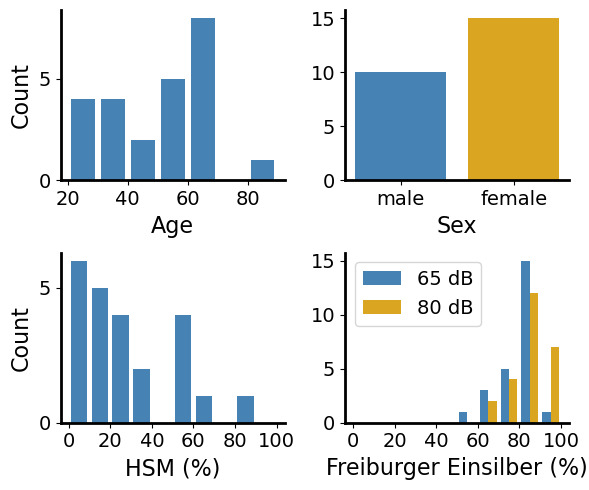

In [26]:
fig, ((ax, ax1,),(ax2, ax3)) = plt.subplots(2,2, figsize=(6,5))

ax.hist(age, bins=7, range=(20,90), align='mid', rwidth=0.8, color=c_1)
ax.set_xlabel('Age', fontsize=label_fontsize)
ax.set_ylabel('Count', fontsize=label_fontsize)
ax.set_xticks(np.arange(20, 91, 20), labels= np.arange(20,91,20), fontsize = tick_fontsize)
ax.set_yticks(np.arange(0, 10, 5), labels= np.arange(0,10,5), fontsize = tick_fontsize)
#ax.set_title('age distribution')

#sex_counts = sex_counts[:,np.newaxis].T
ax1.bar(sex_unique, sex_counts, color=[c_1, c_2])
ax1.set_yticks(np.arange(0, 16, 5), labels= np.arange(0,16,5), fontsize = tick_fontsize)
ax1.set_xticks([0,1], labels = ['male', 'female'], fontsize = tick_fontsize)
ax1.set_xlabel('Sex', fontsize=label_fontsize)

ax2.hist(hsm_scores, range=(0,100), align='mid', rwidth=0.8, color=c_1)
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_xlabel('HSM (%)', fontsize=label_fontsize)
ax2.set_ylabel('Count', fontsize=label_fontsize)
ax2.set_xticks(np.arange(0, 101, 20), labels= np.arange(0,101,20), fontsize = tick_fontsize)
ax2.set_yticks(np.arange(0, 10, 5), labels= np.arange(0,10,5), fontsize = tick_fontsize)

fe_data = np.vstack((fe_65_db_mean, fe_80_db_mean)).T
labels = ['65 dB', '80 dB']
ax3.hist(fe_data, range=(0,100), align='mid', rwidth=0.8, alpha=1, label=labels, color=[c_1, c_2])
ax3.set_xlabel('Freiburger Einsilber (%)', fontsize=label_fontsize)
ax3.set_xticks(np.arange(0, 101, 20), labels= np.arange(0,101,20), fontsize = tick_fontsize)
ax3.set_yticks(np.arange(0, 16, 5), labels= np.arange(0,16,5), fontsize = tick_fontsize)
ax3.legend(fontsize = tick_fontsize)

for ax in fig.get_axes():
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(axis_linewidth)
    ax.spines['bottom'].set_linewidth(axis_linewidth)
plt.tight_layout()

fig_path = os.path.join(base_dir, 'reports', 'figures', 'cohort')
fig_name = '/cohort_demographics'
extensions = ['.png', '.svg', '.pdf']
for ext in extensions:
    fig.savefig(fig_path + fig_name + ext, bbox_inches='tight', dpi=300)